# 실습!

In [2]:
# Library Load

import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


Data Load

In [ ]:
# 데이터 불러오기
bank_df_raw = pd.read_csv('bank-full.csv', encoding = 'cp949')

# 데이터 확인
bank_col = list(bank_df_raw.columns)
print(bank_df_raw.head(), bank_df_raw.shape, '\n ================================')

# 결측값 확인 
# 만약 결측값이 있다면 fillna 명령어로 채워주는거 필수!
for i in bank_col:
    print(bank_df_raw[i][bank_df_raw[i].isna()])
print('================================')
    
# 데이터 확인
# distinct 명령어와 동일 개념
for i in bank_col:
    print(bank_df_raw[i].unique())


string to int
(학습 시킬때 문자 인식x)

In [28]:
bank_df_raw.job.replace(['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown',
 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student'],
                       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace = True)
bank_df_raw.marital.replace(['single', 'married', 'divorced'], [0, 1, 2], inplace = True)
bank_df_raw.education.replace(['tertiary', 'secondary', 'unknown', 'primary'], [0, 1, 2, 3], inplace = True)
bank_df_raw.month.replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace = True)
bank_df_raw.contact.replace(['unknown', 'cellular', 'telephone'], [0, 1, 2], inplace = True)
bank_df_raw.poutcome.replace(['unknown', 'failure', 'other', 'success'], [0, 1, 2, 3], inplace = True)
bank_df_raw.pdays[bank_df_raw.pdays == -1] = max(bank_df_raw.pdays)

bank_df_raw.replace(['no', 'yes'], [0, 1], inplace =True)
print(bank_df_raw.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    0        1          0        0     2143        1     0        0   
1   44    1        0          1        0       29        1     0        0   
2   33    2        1          1        0        2        1     1        0   
3   47    3        1          2        0     1506        1     0        0   
4   33    4        0          2        0        1        0     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      4       261         1    871         0         0  0  
1    5      4       151         1    871         0         0  0  
2    5      4        76         1    871         0         0  0  
3    5      4        92         1    871         0         0  0  
4    5      4       198         1    871         0         0  0  


/product/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


one hot encoding

In [49]:
job_dummies = pd.get_dummies(bank_df_raw.job, prefix='job', drop_first= True)
marital_dummies = pd.get_dummies(bank_df_raw.marital, prefix='marital', drop_first= True)
education_dummies = pd.get_dummies(bank_df_raw.education, prefix='education', drop_first= True)
month_dummies = pd.get_dummies(bank_df_raw.month, prefix='month', drop_first= True)
contact_dummies = pd.get_dummies(bank_df_raw.contact, prefix='contact', drop_first= True)
poutcome_dummies = pd.get_dummies(bank_df_raw.poutcome, prefix='poutcome', drop_first= True)

bank_df_raw = pd.concat([bank_df_raw, job_dummies, marital_dummies, education_dummies,
                        month_dummies, contact_dummies, poutcome_dummies], axis=1)


job_col = list(job_dummies.columns)
marital_col = list(marital_dummies.columns)
education_col = list(education_dummies.columns)
month_col = list(month_dummies.columns)
contact_col = list(contact_dummies.columns)
poutcome_col = list(poutcome_dummies.columns)

print(bank_df_raw.shape)

(45211, 81)


In [50]:
# 사용할 데이터들만 묶어서 정리
bank_new_col = ['y', 'age', 'default', 'balance', 'housing', 'loan', 'month', 'duration', 'pdays', 'previous'] + \
                job_col + marital_col + education_col + month_col + contact_col + poutcome_col
print(bank_new_col, len(bank_new_col))

bank_new = np.asarray(bank_df_raw[bank_new_col])
print( bank_new.shape)

['y', 'age', 'default', 'balance', 'housing', 'loan', 'month', 'duration', 'pdays', 'previous', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'marital_1', 'marital_2', 'education_1', 'education_2', 'education_3', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'contact_1', 'contact_2', 'poutcome_1', 'poutcome_2', 'poutcome_3'] 42
(45211, 74)


Train & Test set

In [77]:
np.random.seed(982)
np.random.shuffle(bank_new)
# print(bank_new[:10,:])

nRows, nCols = bank_new.shape
print ('Row num : ',nRows, 'Column num : ', nCols)
fTrain_ratio = 0.7 # train set's raito

Tr,Te = bank_new[:int(nRows*fTrain_ratio),:], bank_new[int(nRows*fTrain_ratio):,:]
Tr_X, Tr_Y = Tr[:,1:], Tr[:,0]
Te_X, Te_Y = Te[:,1:], Te[:,0]

print(Tr_X.shape, Tr_Y.shape, Te_X.shape, Te_Y.shape)

Row num :  45211 Column num :  74
(31647, 73) (31647,) (13564, 73) (13564,)


# ~2~

Learning

In [1]:
# fit logistic regression
from sklearn import linear_model

clf = linear_model.LogisticRegression(C=1000)
clf.fit(Tr_X, Tr_Y) # fit


# # fit a classification tree with max_depth=3 on all data
# from sklearn.tree import DecisionTreeClassifier

# # clf = DecisionTreeClassifier(class_weight = None, criterion='gini')
# clf = DecisionTreeClassifier(class_weight ='balanced', max_depth = 7, max_features = 'sqrt', criterion='entropy')
# clf.fit(Tr_X, Tr_Y) # fit


# from sklearn.ensemble import RandomForestClassifier

# # clf = RandomForestClassifier(max_depth = 5)
# clf = RandomForestClassifier(class_weight ='balanced', max_depth = 7, max_features = 'sqrt', criterion='entropy',
#                               n_estimators = 200)
# clf.fit(Tr_X, Tr_Y) # fit


# from sklearn.ensemble import GradientBoostingClassifier 

# # clf = GradientBoostingClassifier(learning_rate = 0.1, max_features = 'sqrt', random_state = 1)
# clf = GradientBoostingClassifier(max_depth = 7, max_features = 'sqrt', 
#                                     n_estimators = 200, learning_rate = 0.2, min_samples_split = 3)
# clf.fit(Tr_X, Tr_Y) # fit

NameError: name 'Tr_X' is not defined

In [ ]:
# logistic일 경우
coef_order = abs(clf.coef_).argsort()[0][::-1]
for i in coef_order:
    print(bank_new_col[i+1], "\t", round(clf.coef_[0,i], 3))

# # 나머지일 경우
# coef_order = clf.feature_importances_.argsort()[::-1]
# for i in coef_order:
#     print(bank_new_col[i+1], "\t", round(clf.feature_importances_[i], 3))



confusion matrix

In [89]:
from sklearn.metrics import confusion_matrix
import pandas as pd

y_true = Te_Y
y_pred = clf.predict(Te_X)

cf_matrix = confusion_matrix(y_true, y_pred)
print(pd.DataFrame(cf_matrix, columns = ['0', '1'], index = ['0', '1']))

       0    1
0  11669  293
1   1059  543


In [90]:
def FUN_cf_matrix(y_tr, Te_X, clf, cutoff = 0.5):
    y_pr_list = list()
    prob_list = clf.predict_proba(Te_X)[:,1]
    for i in range(prob_list.shape[0]):
        if prob_list[i] >= cutoff: y_pr_list.append(1)
        else: y_pr_list.append(0)
    y_pr = np.asarray(y_pr_list)
    
    cf_matrix = confusion_matrix(y_tr, y_pr)   
    print('Precision =', cf_matrix[1,1]/(cf_matrix[0,1]+cf_matrix[1,1]))
    print('recall    =', cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1]))
    print(pd.DataFrame(cf_matrix, columns = ['0', '1'], index = ['0', '1']))
    return cf_matrix

FUN_cf_matrix(Te_Y, Te_X, clf, cutoff = 0.3)

Precision = 0.5692832764505119
recall    = 0.5205992509363296
       0    1
0  11331  631
1    768  834


array([[11331,   631],
       [  768,   834]])

precision recall curve

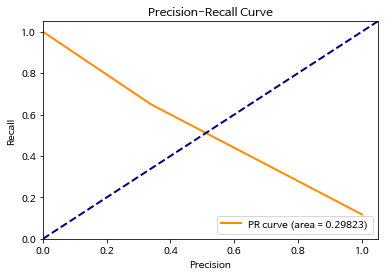

In [91]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

fAUPRC = average_precision_score(y_true=y_true, y_score= clf.predict(Te_X))
precision, recall, _ = precision_recall_curve(y_true, clf.predict(Te_X)) 

plt.figure()
plt.plot(recall, precision, color='darkorange',lw=2, label='PR curve (area = %0.5f)' % fAUPRC)
plt.plot([0, 1.05], [0, 1.05], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1.05]) # range for x-axis
plt.ylim([0.0, 1.05])   # range for y-axis
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()
plt.close()

ROC curve

AUROC =  0.6572285395637997


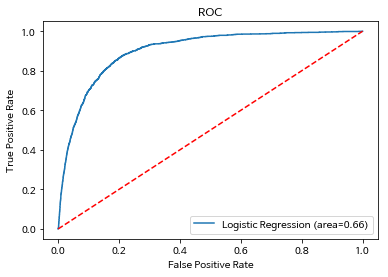

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Te_Y, clf.predict(Te_X))
fpr, tpr, thresholds = roc_curve(Te_Y, clf.predict_proba(Te_X)[:,1])

print('AUROC = ', logit_roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')

plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

Lift

In [106]:

data = np.concatenate( (clf.predict_proba(Te_X)[:,1].reshape(-1,1), Te_Y.reshape(-1,1)), axis=1 )
features = ['predict_proba', 'y_real']
df_lift = pd.DataFrame(data, columns = features)
df_lift.sort_values(by = 'predict_proba', ascending=False, inplace=True)
df_lift.index = list(range(df_lift.shape[0]))
df_lift['rank'] = df_lift['predict_proba'].rank(method='first', ascending=0)
df_lift['rank_perc'] = df_lift['rank']/df_lift['rank'].max()
df_lift['cum_y'] = df_lift['y_real'].cumsum()
df_lift['cum_y_rate'] = df_lift['cum_y'] / df_lift['rank']
df_lift['cum_lift'] = df_lift['cum_y_rate'] / df_lift['cum_y_rate'][df_lift.shape[0]-1]
df_lift.head()


,predict_proba,y_real,rank,rank_perc,cum_y,cum_y_rate,cum_lift
0,1.000000,0.0,1.0,0.000074,0.0,0.000000,0.000000
1,0.999996,1.0,2.0,0.000147,1.0,0.500000,4.233458
2,0.999993,0.0,3.0,0.000221,1.0,0.333333,2.822305
3,0.999984,0.0,4.0,0.000295,1.0,0.250000,2.116729
4,0.999971,0.0,5.0,0.000369,1.0,0.200000,1.693383


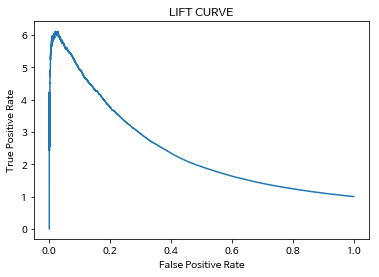

In [107]:
plt.plot(df_lift['rank_perc'], df_lift['cum_lift'], label='Lift Value = %0.2f' %df_lift['cum_lift'].max())

plt.title('LIFT CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()